# I. Présentation du jeu de données

Ce jeu de données est un ensemble de données qui contient toutes les commandes survenues l'année 2017 pour une entreprise de commerce électronique de détail en ligne. L'entreprise vend principalement des produits sur 8 catégories. L'entreprise a recolté des informations sur les commandes dans le but de segmenter leur base client qui constitue l'un des éléments clés qui va déterminer leur stratégie commerciale. 
Cette compréhension aiderait à son tour les équipes de marketing direct, de vente, de gestion des comptes et de produits à mieux soutenir ce client et à améliorer l'offre de produits.


Le jeu de données *data_orders_2017.csv* contient les informations suivantes : 
* "customer" : la colonne représentant le numéro client 
* "order" : la colonne indiquant le numéro de commande, unique 
* "total_items" : la colonne indiquant le nombre d'articles achetés lors d'une commande 
* "discount%" : la colonne indiquant la remise globale affectée à cette commande
* "weekday" : la colonne indiquant le jour (en numéro) de la commande. 1 étant le lundi et 7 étant le dimanche
* "hour" : la colonne indiquant l'heure de la commande 
* "Food%" : la colonne indiquant la part d'articles de la section nourriture parmi les articles de la commande 
* "Fresh%" : la colonne indiquant la part d'articles de la section frais (nourriture fraîche incluant viande, poissons, fruits et légumes) parmi les articles de la commande 
* "Drinks%" : la colonne indiquant la part d'articles de la section boissons parmi les articles de la commande 
* "Home%" : la colonne indiquant la part d'articles de la section maison parmi les articles de la commande 
* "Beauty%" : la colonne indiquant la part d'articles de la section beauté et soins parmi les articles de la commande 
* "Pets%" : la colonne indiquant la part d'articles de la section animaux parmi les articles de la commande 


 L'objectif de ce projet est donc de :
 <b><h3><center>Identifier les segments de clientèle en fonction du comportement d'achat global du client</center></h3></b>




In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import math
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import mixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix


## I.1. Vision globale et découverte des données
Aperçu général des données et leur formats

In [ ]:
# Chargement des données
from google.colab import files
uploaded = files.upload()
import io
import pandas as pd
import numpy as np
order = pd.read_csv(io.BytesIO(uploaded['data_orders_2017.csv']))
order.head()

Saving data_orders_2017.csv to data_orders_2017 (1).csv


,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
0,0,0,45,23.03,4,13,9.46,87.06,3.48,0.00,0.00,0.00,0.0,0.0
1,0,1,38,1.22,5,13,15.87,75.80,6.22,2.12,0.00,0.00,0.0,0.0
2,0,2,51,18.08,4,13,16.88,56.75,3.37,16.48,6.53,0.00,0.0,0.0
3,1,3,57,16.51,1,12,28.81,35.99,11.78,4.62,2.87,15.92,0.0,0.0
4,1,4,53,18.31,2,11,24.13,60.38,7.78,7.72,0.00,0.00,0.0,0.0


In [ ]:
# Statistiques déscriptives sur les variables numériques
#order = pd.read_csv("data_orders_2017.csv",sep=",")
order.describe()

,customer,order,total_items,discount%,weekday,hour,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,5012.483367,14999.500000,31.739933,8.455495,3.642367,15.034667,23.560406,20.227279,23.349235,13.539575,5.892949,1.132959,11.096145,1.043087
std,2888.646245,8660.398374,20.576579,14.199350,2.122031,5.717052,21.719824,23.661767,22.523335,17.850282,13.996518,5.307620,24.740364,6.195390
min,0.000000,0.000000,1.000000,-65.150000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2541.750000,7499.750000,18.000000,1.177500,2.000000,11.000000,7.220000,0.000000,6.710000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5043.000000,14999.500000,29.000000,4.160000,3.000000,15.000000,19.650000,10.930000,17.890000,7.210000,0.000000,0.000000,0.000000,0.000000
75%,7483.000000,22499.250000,41.000000,9.990000,5.000000,20.000000,33.260000,35.790000,33.162500,20.002500,6.512500,0.000000,4.172500,0.000000
max,10238.000000,29999.000000,298.000000,100.000000,7.000000,23.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [ ]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer     30000 non-null  int64  
 1   order        30000 non-null  int64  
 2   total_items  30000 non-null  int64  
 3   discount%    30000 non-null  float64
 4   weekday      30000 non-null  int64  
 5   hour         30000 non-null  int64  
 6   Food%        30000 non-null  float64
 7   Fresh%       30000 non-null  float64
 8   Drinks%      30000 non-null  float64
 9   Home%        30000 non-null  float64
 10  Beauty%      30000 non-null  float64
 11  Health%      30000 non-null  float64
 12  Baby%        30000 non-null  float64
 13  Pets%        30000 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 3.2 MB


La somme des variables caracterisant la composition d'une commande n'est toujours égale à 100%
Dans les cas où elle ou la somme est inférieur à 100, on crée une nouvelle colonne autres% dans lequel on renseigne la différence de pourcentage.
Dans le cas où la somme est supérieur à 100% (cela concerne un cas), cela indique qu'une valeur a été surestimée. On ne peut pas savoir laquelle alors par précaution, on supprime la ligne 

count    30000.000000
mean        99.841636
std          1.886816
min         14.220000
25%        100.000000
50%        100.000000
75%        100.000000
max        107.220000
Name: sum_percentage, dtype: float64


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        3.000e+00, 0.000e+00, 4.000e+00, 1.000e+00, 4.000e+00, 1.000e+00,
        5.000e+00, 0.000e+00, 4.000e+0

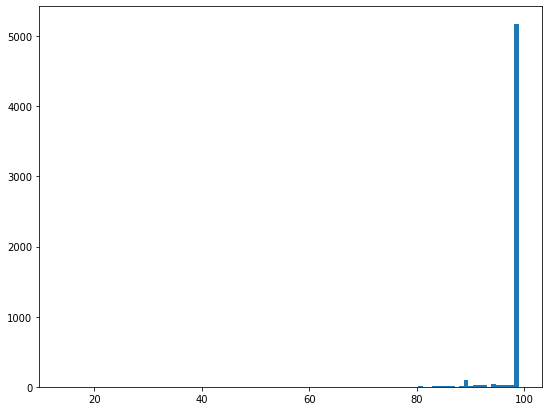

In [ ]:
dims = ['Food%','Fresh%','Drinks%','Home%','Beauty%','Health%','Baby%','Pets%']
order["sum_percentage"] = order[dims].sum(axis=1)
print(order["sum_percentage"].describe())
fig, ax = plt.subplots(1,figsize=(9,7))
ax.hist(order[order.sum_percentage.astype(int) < 100]['sum_percentage'].astype(int), bins=100)

In [ ]:
order = order[order.sum_percentage.astype(int) <= 100]
order['autres%'] = (100 - order["sum_percentage"]).astype(int)
print('Nouveau dataset order : ', order.shape)
print('distribution de la colonne autre : ')
print(order['autres%'].describe())

Nouveau dataset order :  (29999, 16)
count    29999.000000
mean         0.152038
std          1.846189
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         85.000000
Name: autres%, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## I.2. Répartition des nombres de commandes 
Nous allons ici voir la répartition des commandes suivant le jour de la semaine, l'heure, le niveau de remise et le nombre d'articles par commandes. 

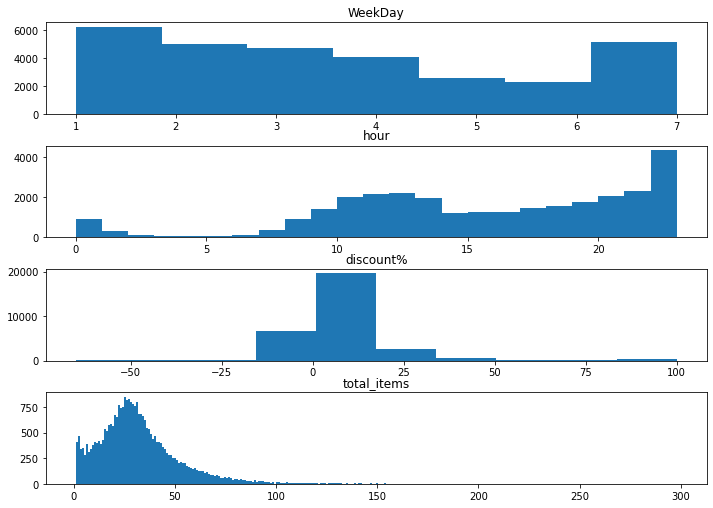

In [ ]:
fig, axs = plt.subplots(4,figsize=(10,7))
fig.tight_layout()
axs[0].title.set_text('WeekDay')
axs[0].hist(order['weekday'] , bins = 7 ) 
axs[1].title.set_text('hour')
axs[1].hist(order['hour'] , bins=23)
axs[2].title.set_text('discount%')
axs[2].hist(order['discount%'])
axs[3].title.set_text('total_items')
axs[3].hist(order['total_items'] , bins=300)
fig.show()

###Pré-analyse du comportement client 
####A. Jour de la semaine 
> Nous constatons que les clients  effectuent leur achat en début de semaine et le dimanche. 
####B. Heure de la semaine 
> Comme attendu, les commandes s'effectuent dans les plages horaires pleines et s'accentue autour de midi et le soir avant minuit. 
####C. Remise
> Les remises sur les commandes se font majoritairment à hauteur 0 à 20%. *Notons ici qu'une remises positive est considérée comme une remise négative, c'est à dire que dans les deux cas, c'est une réduction de prix.*
####D. Nombres d'articles
> Les clients passent généralement entre 0 et 100 articles par commande.

## I.3. Corrélation entre les données
Nous allons effectuer une première corrélation entre les différentes colonnes du jeu de données afin de dégager les tendances.

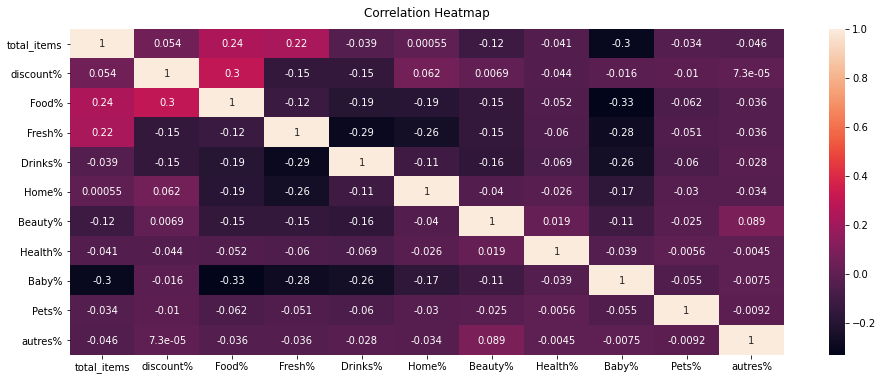

In [ ]:
corrMatrix = order[['total_items','discount%','Food%','Fresh%','Drinks%','Home%','Beauty%','Health%','Baby%','Pets%','autres%']].corr()
plt.figure(figsize=(16, 6))
heatmap = sn.heatmap(corrMatrix, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

## I.5. Analyse par client 
Nous allons aggréger les données en faisant la moyennes pondérées par le nombre d'article acheté les produits achetées, la remise reçue et le nombre d'articles moyenne par commande par client. Ce groupement nous permettra de degager les tendances des clients comme illustré sur le graphique radar. 

### I.5.1 Caractéristiques cycliques 
Afin de pouvoir exploiter les informations dans notre analyse par technique de Machine Learning, nous allons illustrer le problème du temps en tant que caractéristique cyclique en utilisant les fonctions trigonométiques $cos()$ et $sin()$. 

In [ ]:
circularData = {}
circularData['hour'] = order['hour'].max()
circularData['weekday'] = order['weekday'].max()

for col in circularData.keys():
    order["cos_" + col ] = np.cos(2*np.pi*(order[col]/circularData[col]))
    order["sin_" + col ] = np.sin(2*np.pi*(order[col]/circularData[col]))

order["cos_week"] = np.cos(2*np.pi*( (order['hour']*3600+ (order['weekday']-1)*3600*24) / 604800))
order["sin_week"] = np.sin(2*np.pi*( (order['hour']*3600+ (order['weekday']-1)*3600*24) / 604800))

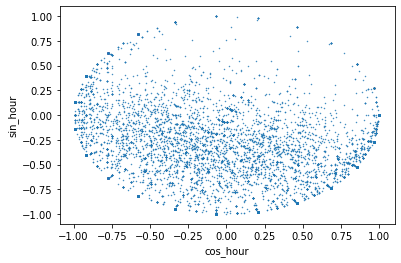

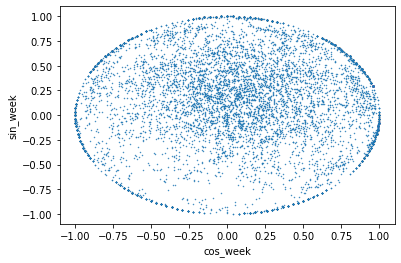

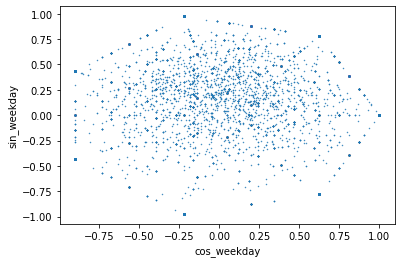

In [ ]:
col = ["cos_hour" , "sin_hour" , "cos_weekday" , "sin_weekday" , "cos_week" , "sin_week"]
agg = ['mean']*6
time = pd.DataFrame()
time = order
d = dict(zip(col,agg))
time = order.groupby(['customer']).agg(d)
time.plot.scatter(x="cos_hour" , y="sin_hour" , s=0.2)
time.plot.scatter(x="cos_week" , y="sin_week" , s=0.2)
time.plot.scatter(x="cos_weekday" , y="sin_weekday" , s=0.2)

### I.5.2 Moyenne pondérée

Nous allons aggréger les données en faisant la moyennes pondérées par le nombre d'article acheté les produits achetées, la remise reçue et le nombre d'articles moyenne par commande par client. Ce groupement nous permettra de degager les tendances des clients comme illustré sur le graphique radar. 

In [ ]:
# moyenne pondérée par le nombre d'articles
dims = ['discount%','Food%','Fresh%','Drinks%','Home%','Beauty%','Health%','Baby%','Pets%']
# Étape 1 : Pour chaque colonne dans la liste dims : on divise par 100 et on multiplie par le nombre total d'article (total_items)
data_weighted = (order[dims]/100).multiply(order['total_items'],axis="index")
# Étape 2 : on obtient la moyenne en sommant les lignes sur le client puis en divisant par le nombre total d'article par client
data_sumed_up = data_weighted.join(order[['customer','total_items']]).groupby(['customer']).sum()
data_weighted_mean = data_sumed_up[dims].multiply(1/data_sumed_up['total_items'], axis="index")*100
data_weighted_mean.head()

,discount%,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
customer,,,,,,,,,
0,14.961119,14.101791,72.330970,4.215149,6.873433,2.485299,0.000000,0.000000,0.0
1,18.012071,19.432937,50.976035,16.073435,3.858218,2.815891,5.212343,1.632424,0.0
2,2.970000,24.100000,22.290000,38.690000,14.920000,0.000000,0.000000,0.000000,0.0
3,3.471362,24.496275,53.752175,9.344945,9.946072,0.000000,0.000000,2.460282,0.0
4,3.651593,19.793468,59.634617,12.835685,6.668407,0.955706,0.000000,0.111089,0.0


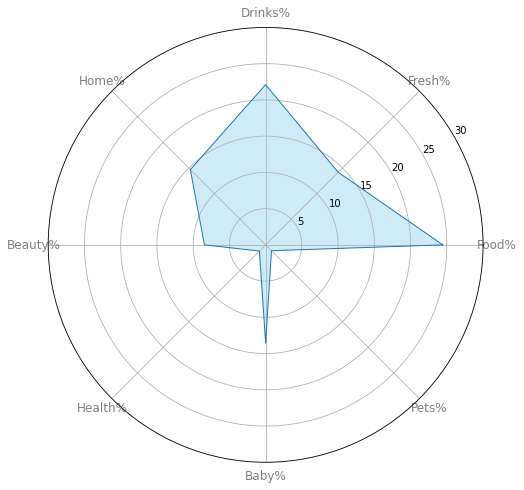

In [ ]:
import matplotlib.pyplot as plt
from math import pi

categories = ['Food%','Fresh%','Drinks%','Home%','Beauty%','Health%','Baby%','Pets%']
values =  data_weighted_mean[categories].mean().values.flatten().tolist()
values += values[:1] # repeat the first value to close the circular graph
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.ylim(0, 30)
ax.set_rlabel_position(30)

ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'skyblue', alpha=0.4)

plt.show()

# II. Segmentation de la base client

## II.1. Préparation des données

In [ ]:
# On rajoute les variables total_items_sum total_items_mean correspondant à la somme et la moyenne des articles totaux achetés
customer = data_weighted_mean.merge(data_sumed_up['total_items'], on='customer').merge(order[['customer','total_items']].groupby(['customer']).mean(), on='customer', suffixes=('_sum','_mean'))
# On ajoute la variable nb_commande qui renseigne le nombre de commande passées par client
customer["nb_order"] = order[['customer','order']].groupby(["customer"]).count()
customer.head()

,discount%,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%,total_items_sum,total_items_mean,nb_order
customer,,,,,,,,,,,,
0,14.961119,14.101791,72.330970,4.215149,6.873433,2.485299,0.000000,0.000000,0.0,134,44.666667,3
1,18.012071,19.432937,50.976035,16.073435,3.858218,2.815891,5.212343,1.632424,0.0,623,31.150000,20
2,2.970000,24.100000,22.290000,38.690000,14.920000,0.000000,0.000000,0.000000,0.0,26,26.000000,1
3,3.471362,24.496275,53.752175,9.344945,9.946072,0.000000,0.000000,2.460282,0.0,639,27.782609,23
4,3.651593,19.793468,59.634617,12.835685,6.668407,0.955706,0.000000,0.111089,0.0,496,17.103448,29


On procède à la normalisation des vecteurs 'total_items_sum', 'total_items_mean', 'nb_order', pour qu'ils soient sur la même echelle entre 0 et 100. Pour cela, on recourt à la classe MinMaxScaler de la bibliothèque sklearn preprocessing.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,100))
features_to_scale = ['total_items_sum',	'total_items_mean',	'nb_order']

scaler.fit(customer[features_to_scale])
X_scaled = scaler.transform(customer[features_to_scale])
customer_scaled = pd.DataFrame(X_scaled,columns=['total_items_sum',	'total_items_mean',	'nb_order']).join(customer[dims])
customer_scaled.head()

,total_items_sum,total_items_mean,nb_order,discount%,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
0,8.007225,14.702581,3.921569,14.961119,14.101791,72.330970,4.215149,6.873433,2.485299,0.000000,0.000000,0.0
1,37.447321,10.151515,37.254902,18.012071,19.432937,50.976035,16.073435,3.858218,2.815891,5.212343,1.632424,0.0
2,1.505117,8.417508,0.000000,2.970000,24.100000,22.290000,38.690000,14.920000,0.000000,0.000000,0.000000,0.0
3,38.410596,9.017713,43.137255,3.471362,24.496275,53.752175,9.344945,9.946072,0.000000,0.000000,2.460282,0.0
4,29.801325,5.422036,54.901961,3.651593,19.793468,59.634617,12.835685,6.668407,0.955706,0.000000,0.111089,0.0


## II.2. Matrice de corrélation

In [ ]:
mat = customer_scaled.corr()
mat.style.background_gradient(cmap='coolwarm')

,total_items_sum,total_items_mean,nb_order,discount%,Food%,Fresh%,Drinks%,Home%,Beauty%,Health%,Baby%,Pets%
total_items_sum,1.000000,0.452234,0.834098,-0.095111,0.077101,0.360066,0.022622,-0.046218,-0.141478,-0.031349,-0.195366,-0.026340
total_items_mean,0.452234,1.000000,0.095817,0.172970,0.343425,0.277169,0.030384,0.012499,-0.218034,-0.040473,-0.355486,-0.038527
nb_order,0.834098,0.095817,1.000000,-0.137836,-0.012192,0.301485,0.047396,-0.058145,-0.124575,-0.023256,-0.103155,-0.019925
discount%,-0.095111,0.172970,-0.137836,1.000000,0.494500,-0.183236,-0.208263,-0.030064,-0.059685,-0.058596,-0.058057,-0.026901
Food%,0.077101,0.343425,-0.012192,0.494500,1.000000,-0.075144,-0.182917,-0.206296,-0.218606,-0.052077,-0.359430,-0.068053
Fresh%,0.360066,0.277169,0.301485,-0.183236,-0.075144,1.000000,-0.144491,-0.187879,-0.160695,-0.039206,-0.267061,-0.042320
Drinks%,0.022622,0.030384,0.047396,-0.208263,-0.182917,-0.144491,1.000000,-0.085019,-0.215324,-0.061931,-0.298137,-0.056487
Home%,-0.046218,0.012499,-0.058145,-0.030064,-0.206296,-0.187879,-0.085019,1.000000,-0.094543,-0.033903,-0.201644,-0.025847
Beauty%,-0.141478,-0.218034,-0.124575,-0.059685,-0.218606,-0.160695,-0.215324,-0.094543,1.000000,0.004560,-0.150329,-0.036591
Health%,-0.031349,-0.040473,-0.023256,-0.058596,-0.052077,-0.039206,-0.061931,-0.033903,0.004560,1.000000,-0.047456,-0.000656


## II.3. Clustering avec l'algortihme K-MEANS





Notre modèle possède un certains nombre de variables et la pertinence de l'ensemble d'entre elles n'est pas vérifiée. Ainsi, nous avons décidé d'implémenter un modèle de PCA afin de potentiellement réduire le nombre de dimension de notre modèle K-means et son efficacité. 

0.9441092088317443

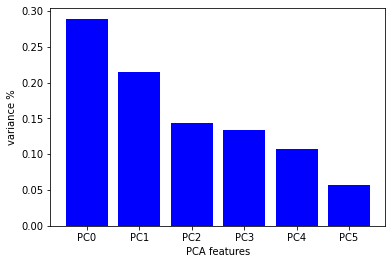

In [ ]:
from sklearn.decomposition import PCA
# On crée une instance de PCA
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(customer_scaled)
# Features correspondent ici aux noms données aux nouvelles dimensions créées par le PCA
features=["PC"+ str(i) for i in range(pca.n_components_)]

#On affiche l'importance de chacun des nouveaux axes créés
plt.bar(features, pca.explained_variance_ratio_, color='blue')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)
sum(pca.explained_variance_ratio_) #Cette valeur caractérise la proportion d'information globale récolté à l'aide de ses 6 nouveaux axes

Sur le graphique ci dessus, on peut voir l'importance de chacune des nouvelles variables créées par PCA. La valeur située au-dessus du graphique nous explique ici qu'avec 6 dimensions, on peut récolter 95% de l'information du dataset, et donc que cette réduction est exemplaire. 
 

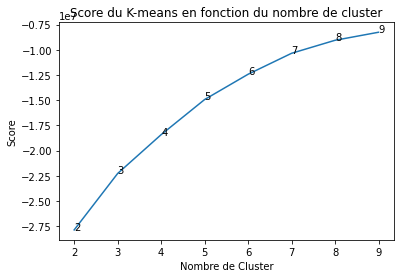

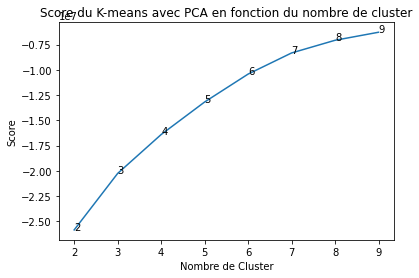

In [ ]:
x=[]
y=[]
y1=[]
for i in range(2,10): #Pour un nombre de composant de 2 à 10
    kmeans = KMeans(n_clusters=i).fit(customer_scaled) #On instancie l'algorithme kmean avec un nombre de centroid = à i
    PCA_kmeans = KMeans(n_clusters=i).fit(PCA_components)#On instancie l'algorithme l'algorithme de K-means avec une application de PCA en amont
    PCA_kmeans.fit(PCA_components) #On entraine notre modele
    y.append(kmeans.score(customer_scaled))#On ajoute le score de notre modele kmean afin d'effectuer le tracer par la suite 
    x.append(i)
    y1.append(PCA_kmeans.score(PCA_components))#On ajoute le score de notre modele PCA + K-means afin d'effectuer le tracer par la suite 
plt.plot(x,y)
for i_x,i_y in zip(x,y):
    plt.text(i_x,i_y,str(i_x))#Pour chaque point tracé on ajoute un label text qui correspond à son abscisse 
plt.title('Score du K-means en fonction du nombre de cluster')
plt.xlabel('Nombre de Cluster')
plt.ylabel('Score')
plt.show()
plt.plot(x,y1)
for i_x,i_y in zip(x,y1):
    plt.text(i_x,i_y,str(i_x))
plt.ylabel('Score')
plt.xlabel('Nombre de Cluster')
plt.title('Score du K-means avec PCA en fonction du nombre de cluster')
plt.show()

A l'aide des deux graphiques ci-dessus, on observe que l'ajout d'un PCA avec le lancement de notre modèle K-means améliore légèrement nos résultats. De plus, ici en prenant en compte le "elbow criterion", on considère que le nombre de clusters optimal dans notre cas est de 4. On va donc continuer notre analyse avec ce chiffre. 

In [ ]:
# fonction qui associe à chaque client son cluster calculé par le model K-means
# Partitionne le jeu de données original en regroupant dans un même dataframe les client appartenant au même groupe.
# Retourne un dictionnaire contenant 4 dataframe, correspondant au 4 clusters.
def getDictLabel(data,originalData,model):
    i=0
    individuWithLabel = {}
    for label in model.predict(data):
        individuWithLabel[i] = label
        i=i+1
    dataFrameLabel = {}
    i=0
    for individu in individuWithLabel:
        try: 
            dataFrameLabel[individuWithLabel[individu]] = dataFrameLabel[individuWithLabel[individu]].append(originalData.iloc[i])
        except KeyError :
            dataFrameLabel[individuWithLabel[individu]]=pd.DataFrame()
            dataFrameLabel[individuWithLabel[individu]] = dataFrameLabel[individuWithLabel[individu]].append(originalData.iloc[i])
        i=i+1
    return dataFrameLabel

kmeans = KMeans(n_clusters=4).fit(PCA_components) #On entraine notre algorithme aves nos données et un nombre de centroid = 4       
# Dictionnaire associant à chaque cluster le dataframe correspondant
dataFrameLabel = getDictLabel(PCA_components,customer,kmeans)
dataFrameLabel[0].head()
for i in range(4):
  print(dataFrameLabel[i].shape[0])

1343
7752
690
454


## II.4 Visualisation des clusters

###*Composition moyenne des commandes par cluster*

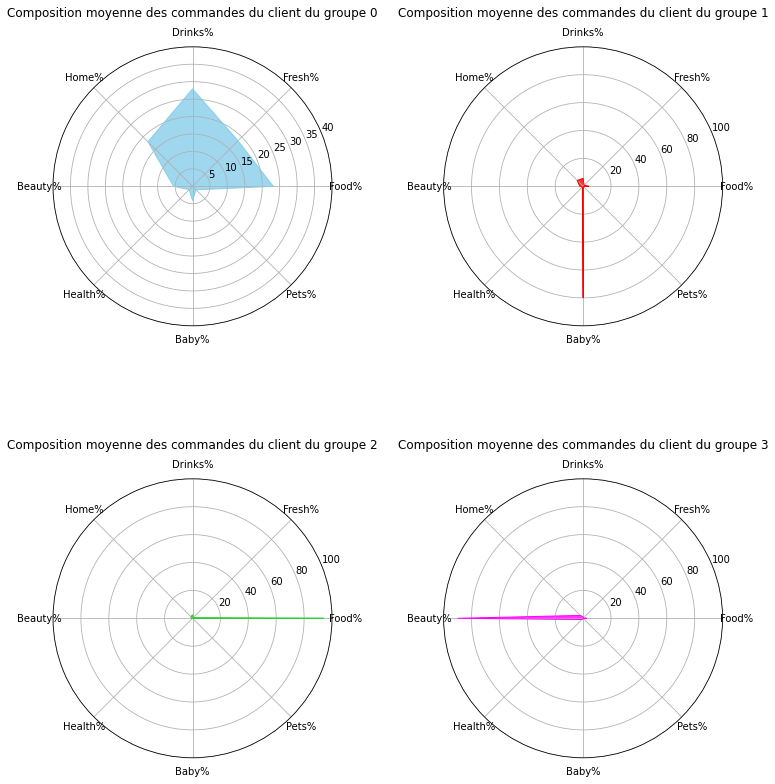

In [ ]:
import matplotlib.pyplot as plt
from math import pi

categories = ['Food%','Fresh%','Drinks%','Home%','Beauty%','Health%','Baby%','Pets%']
values1 =  dataFrameLabel[0][categories].mean().values.flatten().tolist()
values1 += values1[:1] # On répète la première valeur pour fermer le graphique circulaire
values1 = [x for x in values1 ]
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

values2 =  dataFrameLabel[1][categories].mean().values.flatten().tolist()
values2 += values2[:1] # On répète la première valeur pour fermer le graphique circulaire
values2 = [x for x in values2]

values3 =  dataFrameLabel[2][categories].mean().values.flatten().tolist()
values3 += values3[:1] # On répète la première valeur pour fermer le graphique circulaire
values3 = [x for x in values3]

values4 =  dataFrameLabel[3][categories].mean().values.flatten().tolist()
values4 += values4[:1] # On répète la première valeur pour fermer le graphique circulaire
values4 = [x for x in values4]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12),
                       subplot_kw=dict(polar=True))
plt.subplots_adjust(left = 0.125, right = 0.9, bottom = 0.3, top = 1.3, wspace = 0.4, hspace = 0.0)
plt.subplots_adjust(left = 0.125, right = 0.9, bottom = 0.3, top = 1.3, wspace = 0.4, hspace = 0.0)
axes[0][0].set_xticks(angles[:-1])
axes[0][0].set_xticklabels(categories)

axes[0][1].set_xticks(angles[:-1])
axes[0][1].set_xticklabels(categories)

axes[1][0].set_xticks(angles[:-1])
axes[1][0].set_xticklabels(categories)

axes[1][1].set_xticks(angles[:-1])
axes[1][1].set_xticklabels(categories)

axes[0][0].set_ylim(0, 40)
axes[0][1].set_ylim(0, 100)
axes[1][0].set_ylim(0, 100)
axes[1][1].set_ylim(0, 100)


#ax1.set_rlabel_position(30)
 
axes[0][0].plot(angles, values1, linewidth=1.0, linestyle='solid', color='skyblue')
axes[0][0].fill(angles, values1, 'skyblue', alpha=0.8)

axes[0][1].plot(angles, values2, linewidth=1.0, linestyle='solid', color='red')
axes[0][1].fill(angles, values2, 'red', alpha=0.8)

axes[1][0].plot(angles, values3, linewidth=1.0, linestyle='solid', color='limegreen')
axes[1][0].fill(angles, values3, 'limegreen', alpha=0.8)

axes[1][1].plot(angles, values4, linewidth=1.0, linestyle='solid', color = 'magenta')
axes[1][1].fill(angles, values4, 'magenta', alpha=0.8)

axes[0][0].set_title('Composition moyenne des commandes du client du groupe 0', pad=16.0)
axes[0][1].set_title('Composition moyenne des commandes du client du groupe 1', pad=16.0)
axes[1][0].set_title('Composition moyenne des commandes du client du groupe 2', pad=16.0)
axes[1][1].set_title('Composition moyenne des commandes du client du groupe 3', pad=16.0)
plt.show()

### *Caracteristiques des clusters en termes de quantité d'articles par client, nombre de commandes par clients, nombre moyen d'articles par commande, taux de remise moyen par commande*

## II.4. K-means avec les variables de temps

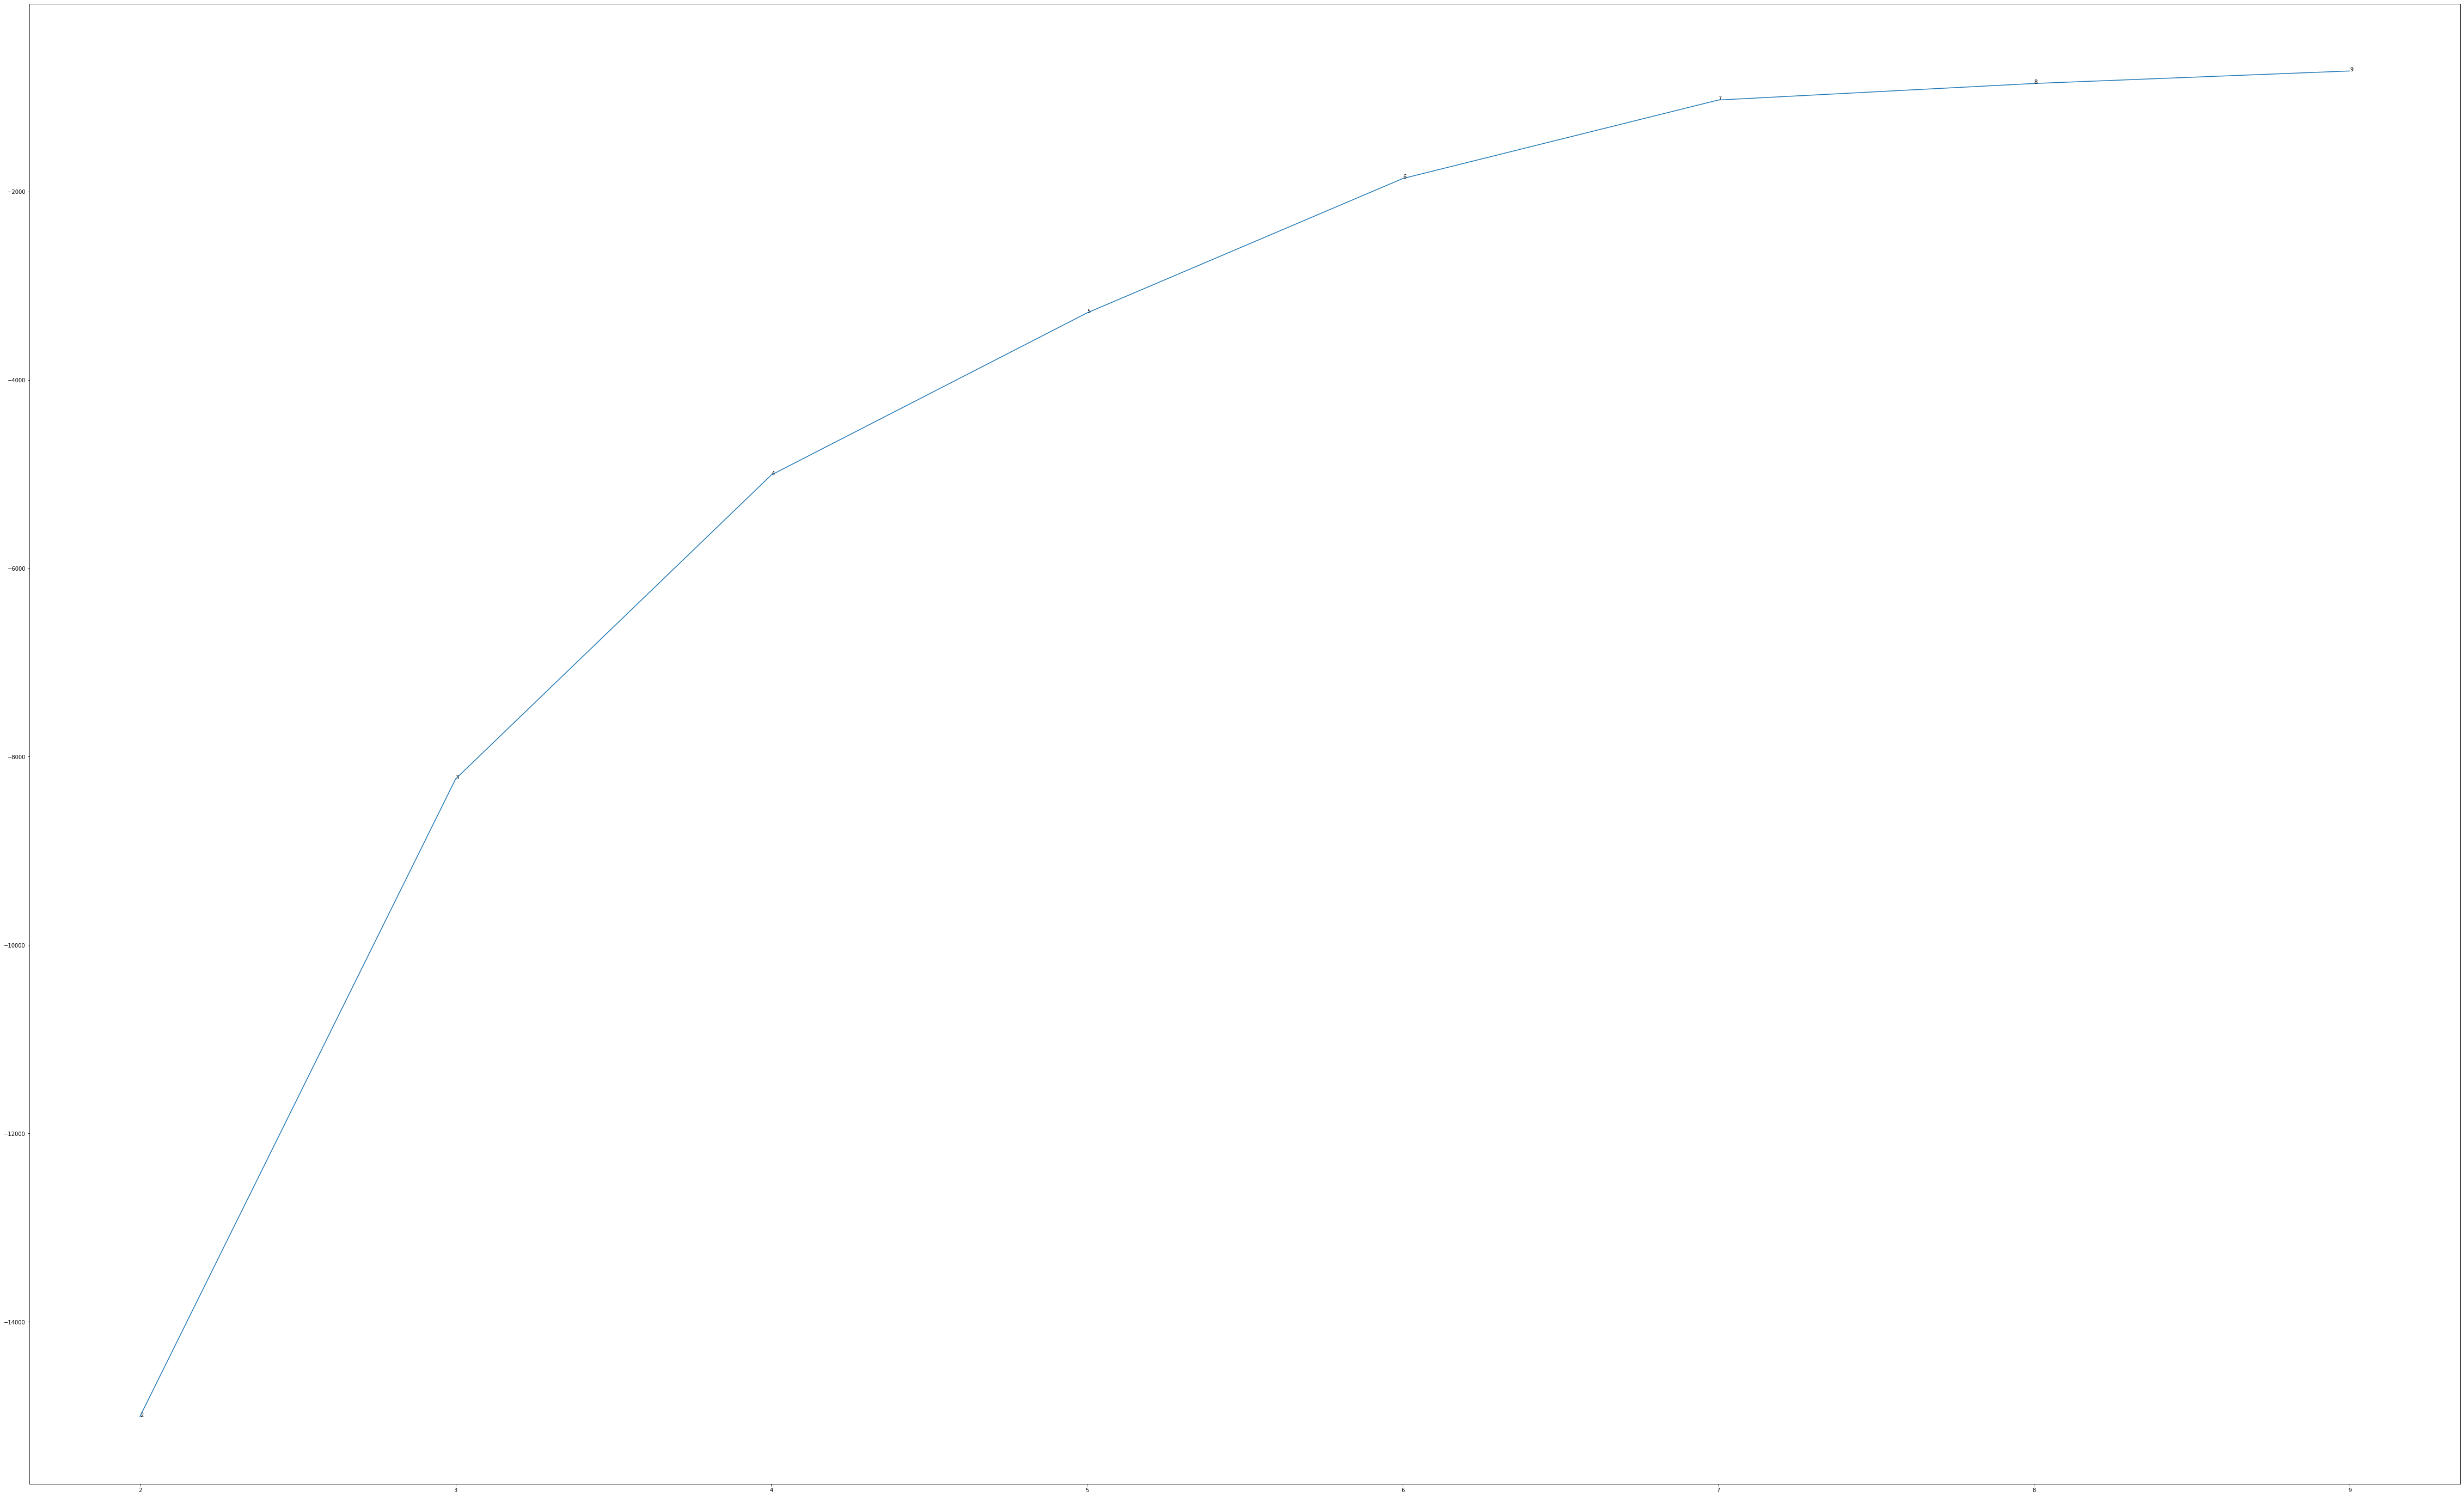

17.0  0.0
5443
7.0  1.0
6150
8.0  3.0
4952
20.0  3.0
3357
11.0  6.0
5362
8.0  5.0
4736


In [ ]:
def plot_kmean_elbow(data,rng):
    x=[]
    y=[]
    for i in range(2,rng):
        kmeans = KMeans(n_clusters=i).fit(data)
        y.append(kmeans.score(data))
        x.append(i)
    plt.plot(x,y)
    for i_x,i_y in zip(x,y):
        plt.text(i_x,i_y,str(i_x))
    from matplotlib.pylab import rcParams    
    rcParams['figure.figsize'] = 80,50
    plt.show()
        
        
data = order[["cos_week" , "sin_week" ]]
plot_kmean_elbow(data,10)
kmeans = KMeans(n_clusters=6).fit(data) #On entraine notre algorithme aves nos donnée et un nombre de centroid = 4       
a = getDictLabel(data,data,kmeans)
tabCos = []
tabSin = [] 
tabJour = []
tabHour = []
tabVolume = []
jour = ["Lundi" , "Mardi" , "Mercredi" , "Jeudi" , "Vendredi" , "Samedi" , "Dimanche"]
j = 0
for i in a.keys():
    s_x = a[i]["cos_week"].mean()
    s_y = a[i]["sin_week"].mean()
    tabCos.append(s_x)
    tabSin.append(s_y)
    angle = math.atan2(s_y,s_x)
    angle = (angle + math.pi) % math.pi
    angle = (angle/(math.pi))*604800
    id_jour = angle // (60*60*24) 
    angle = angle % (60*60*24) 
    id_hour = angle // (60*60)
    tabJour.append(id_jour)
    tabHour.append(id_hour)
    tabVolume.append(len(a[i]))
    print(str(id_hour) + "  " + str(id_jour))
    print(len(a[i]))
    j=j+1




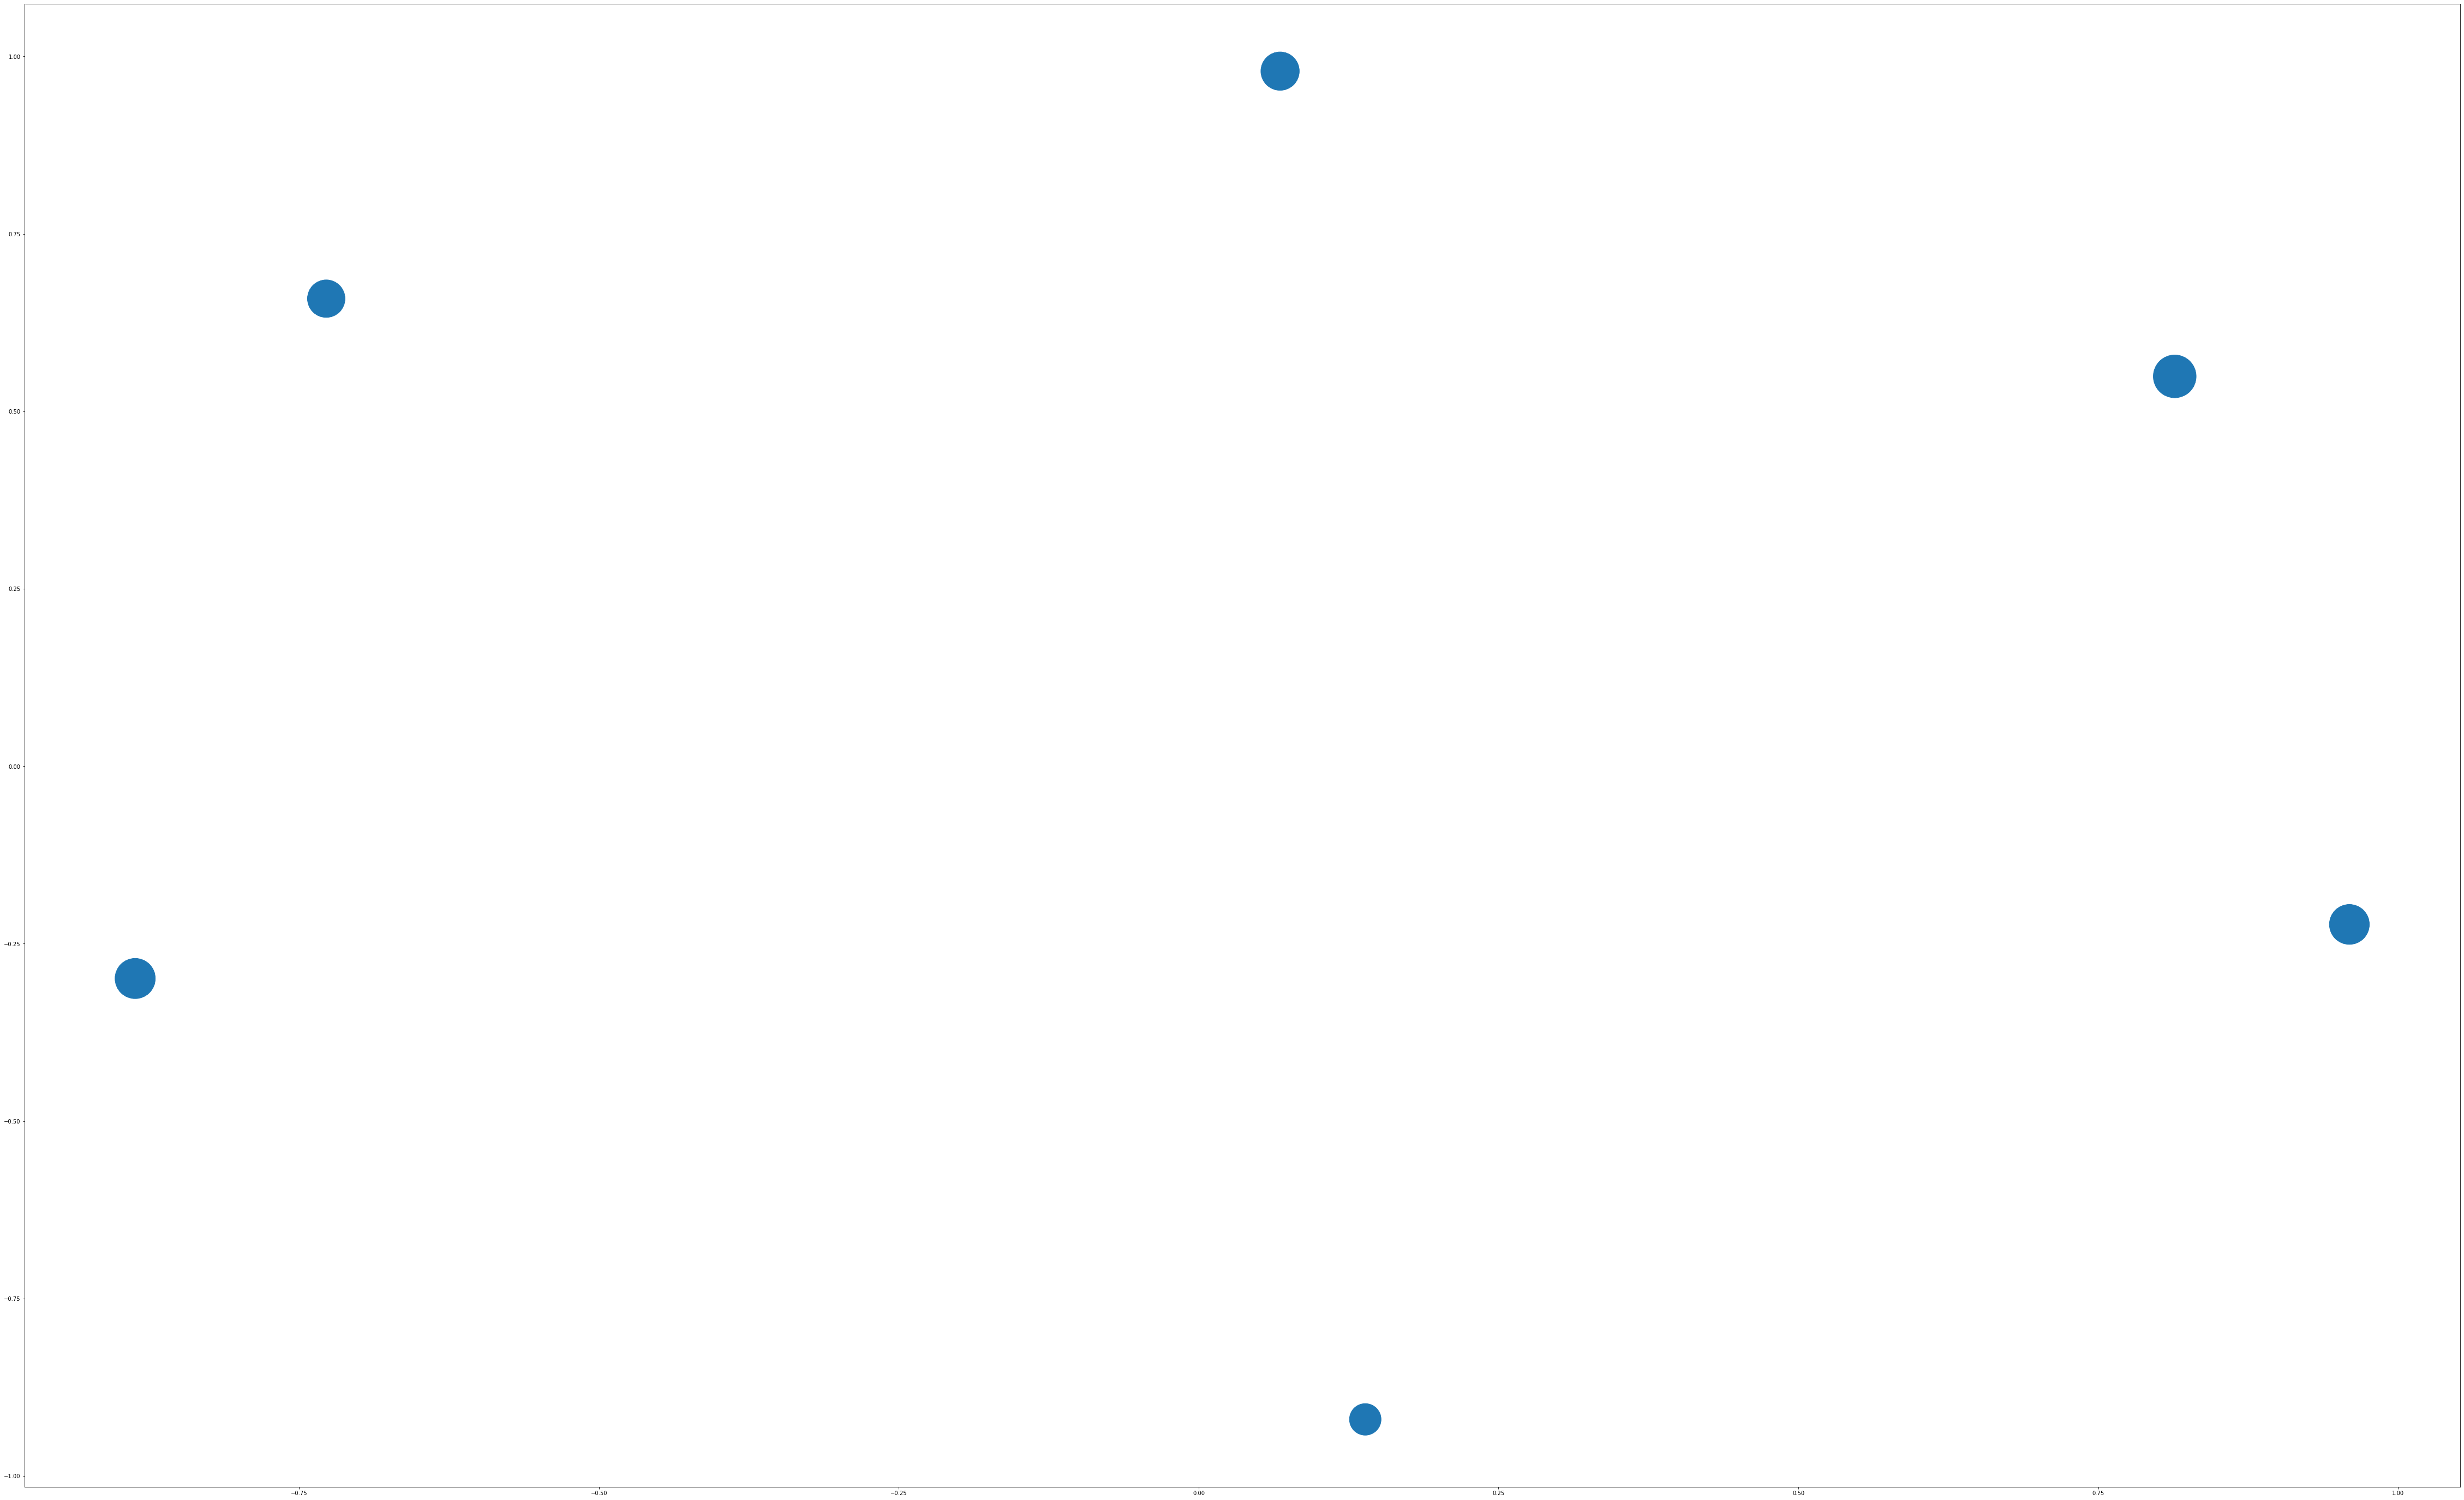

In [ ]:
plt.scatter(tabCos,tabSin,s=tabVolume)
for i_x,i_y in zip(tabCos,tabSin):
    plt.text()#Pour chaque point tracé on ajoute un label text qui correspond à son abscisse 

plt.show()

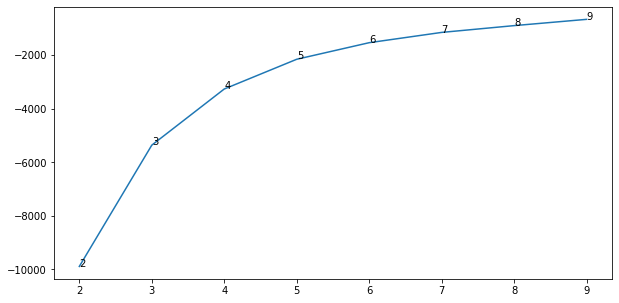

0.0
6378
18.0
4891
22.0
8151
14.0
6809
7.0
3771


In [ ]:
data = order[["cos_hour" , "sin_hour"  ]]
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,5
plot_kmean_elbow(data,10)

kmeans = KMeans(n_clusters=5).fit(data) #On entraine notre algorithme aves nos donnée et un nombre de centroid = 4       
a = getDictLabel(data,data,kmeans)
for i in a.keys():
    s_x = a[i]["cos_hour"].mean()
    s_y = a[i]["sin_hour"].mean()
    angle = math.atan2(s_y,s_x)
    angle = (angle + math.pi) % math.pi
    angle = (angle/(math.pi))*(60*60*24)
    id_hour = angle // (60*60)
    print(str(id_hour) )
    print(len(a[i]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  """


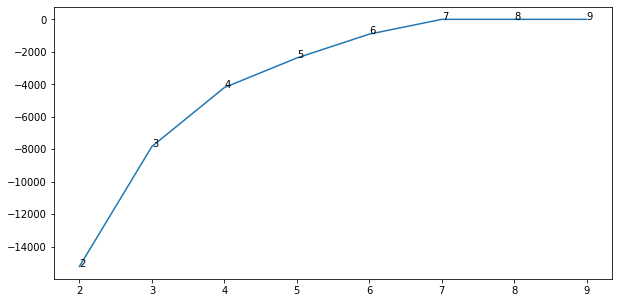

1.0
6619
1.0
6237
4.0
9678
6.0
7466


In [ ]:
data = order[["cos_weekday" , "sin_weekday"]]
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,5
plot_kmean_elbow(data,10)
kmeans = KMeans(n_clusters=4).fit(data) #On entraine notre algorithme aves nos donnée et un nombre de centroid = 4       
a = getDictLabel(data,data,kmeans)
for i in a.keys():
    s_x = a[i]["cos_weekday"].mean()
    s_y = a[i]["sin_weekday"].mean()
    angle = math.atan2(s_y,s_x)
    angle = (angle + math.pi) % math.pi
    angle = (angle/(math.pi))*(60*60*24*7)
    id_jour = angle // (60*60*24)
    print(str(id_jour) )
    print(len(a[i]))

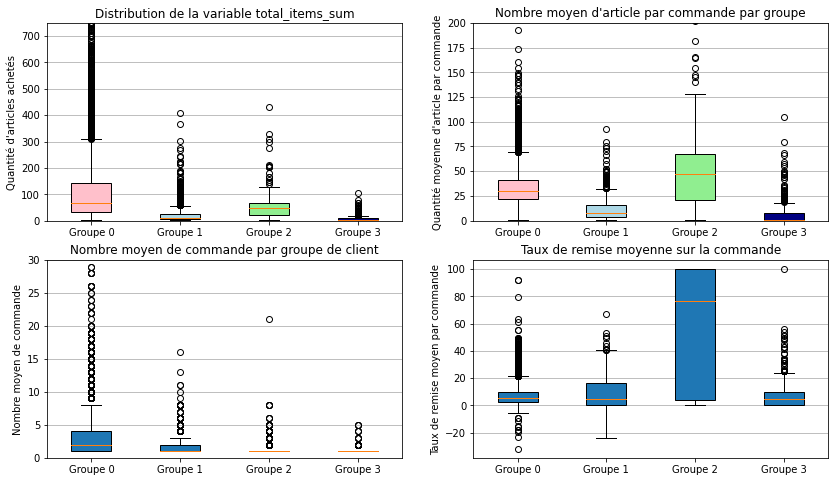

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

sum_items = np.array([dataFrameLabel[0]['total_items_sum'].tolist(),
                      dataFrameLabel[1]['total_items_sum'].tolist(),
                      dataFrameLabel[2]['total_items_sum'].tolist(),
                      dataFrameLabel[3]['total_items_sum'].tolist()],dtype=object)

mean_items = np.array([dataFrameLabel[0]['total_items_mean'].tolist(),
                      dataFrameLabel[1]['total_items_mean'].tolist(),
                      dataFrameLabel[2]['total_items_sum'].tolist(),
                      dataFrameLabel[3]['total_items_sum'].tolist(),],dtype=object)

nborder = np.array([dataFrameLabel[0]['nb_order'].tolist(),
                    dataFrameLabel[1]['nb_order'].tolist(),
                    dataFrameLabel[2]['nb_order'].tolist(),
                    dataFrameLabel[3]['nb_order'].tolist()
                    ],dtype=object)

discnt = np.array([dataFrameLabel[0]['discount%'].tolist(),
                  dataFrameLabel[1]['discount%'].tolist(),
                  dataFrameLabel[2]['discount%'].tolist(),
                  dataFrameLabel[3]['discount%'].tolist()],dtype=object)

labels = ['Groupe 0', 'Groupe 1', 'Groupe 2', 'Groupe 3']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))

# box plot variable total_items_sum
bplot1 = axes[0][0].boxplot(sum_items,
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
axes[0][0].set_title('Distribution de la variable total_items_sum')

# box plot of variable total_items_mean
bplot2 = axes[0][1].boxplot(mean_items,
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
axes[0][1].set_title('Nombre moyen d\'article par commande par groupe')


# box plot of variable total_items_mean
bplot3 = axes[1][0].boxplot(nborder,
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
axes[1][0].set_title('Nombre moyen de commande par groupe de client')

# box plot of variable total_items_mean
bplot3 = axes[1][1].boxplot(discnt,
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
axes[1][1].set_title('Taux de remise moyenne sur la commande')





# fill with colors
colors = ['pink', 'lightblue', 'lightgreen','navy']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in axes:
    for ax_c in ax:
      ax_c.yaxis.grid(True)

axes[0][0].set_ylabel('Quantité d\'articles achetés')
axes[0][1].set_ylabel('Quantité moyenne d\'article par commande')
axes[1][0].set_ylabel('Nombre moyen de commande')
axes[1][1].set_ylabel('Taux de remise moyen par commande')

axes[1][0].set_ylim(0, 30)
axes[0][0].set_ylim(0, 750)
axes[0][1].set_ylim(0, 200)

plt.show()

# III. Machine Learning

In [ ]:
final = pd.DataFrame()
for i in range(4):
  dataFrameLabel[i]["label"] = i
  final = pd.concat([final,dataFrameLabel[i]])





data = pd.DataFrame(pca.fit_transform(final.drop(columns='label',axis=1)))
label = final['label']
X_train, X_test, y_train, y_test = train_test_split(data,label,test_size=0.3 )



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
neigh.score(X_test,y_test)

0.986328125

## Modèle Arbre de décision


In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.9820963541666666

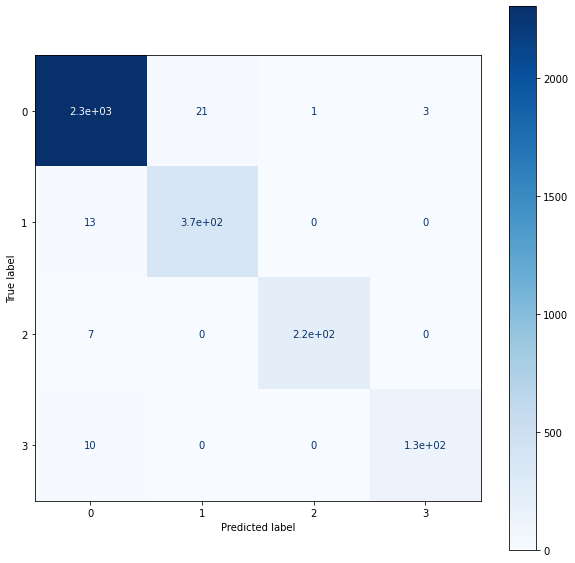

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
plt.rcParams["font.size"] = "10"
plot_confusion_matrix(clf,X_test, y_test, cmap=plt.cm.Blues,ax=ax)
plt.show()  

## Modèle Forêt aléatoire

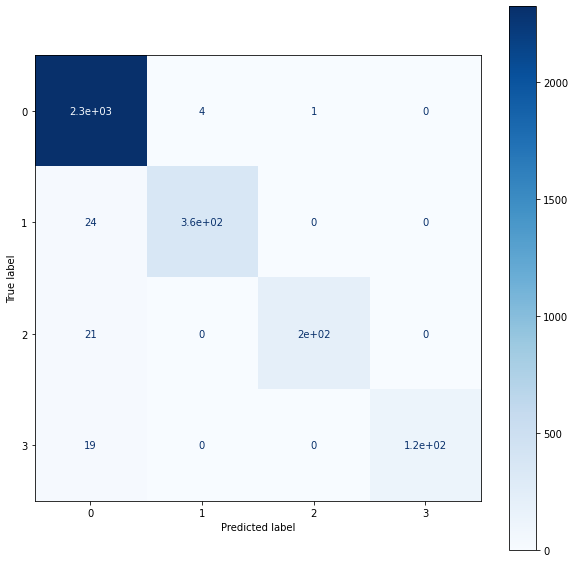

0.9775390625

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)
fig, ax = plt.subplots(figsize=(10,10))
plt.rcParams["font.size"] = "10"
plot_confusion_matrix(clf,X_test, y_test, cmap=plt.cm.Blues,ax=ax)
plt.show() 
clf.score(X_test,y_test)


## Modèle XG Boost

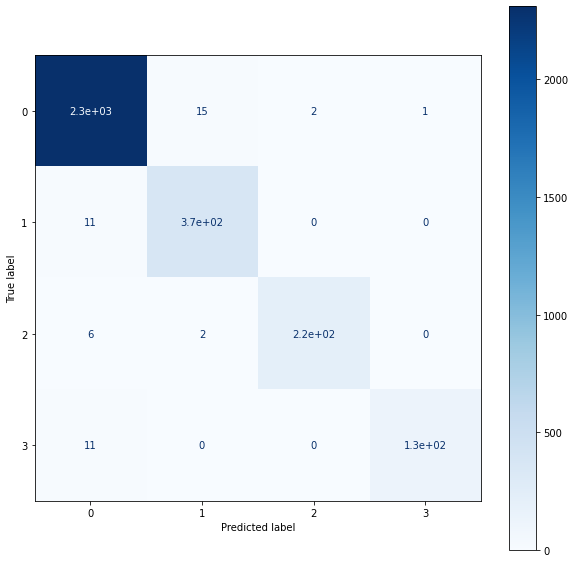

0.984375

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(max_depth=3,n_estimators=3)
model.fit(X_train, y_train)
model.score(X_test,y_test)
fig, ax = plt.subplots(figsize=(10,10))
plt.rcParams["font.size"] = "10"
plot_confusion_matrix(model,X_test, y_test, cmap=plt.cm.Blues,ax=ax)
plt.show()  
model.score(X_test,y_test)

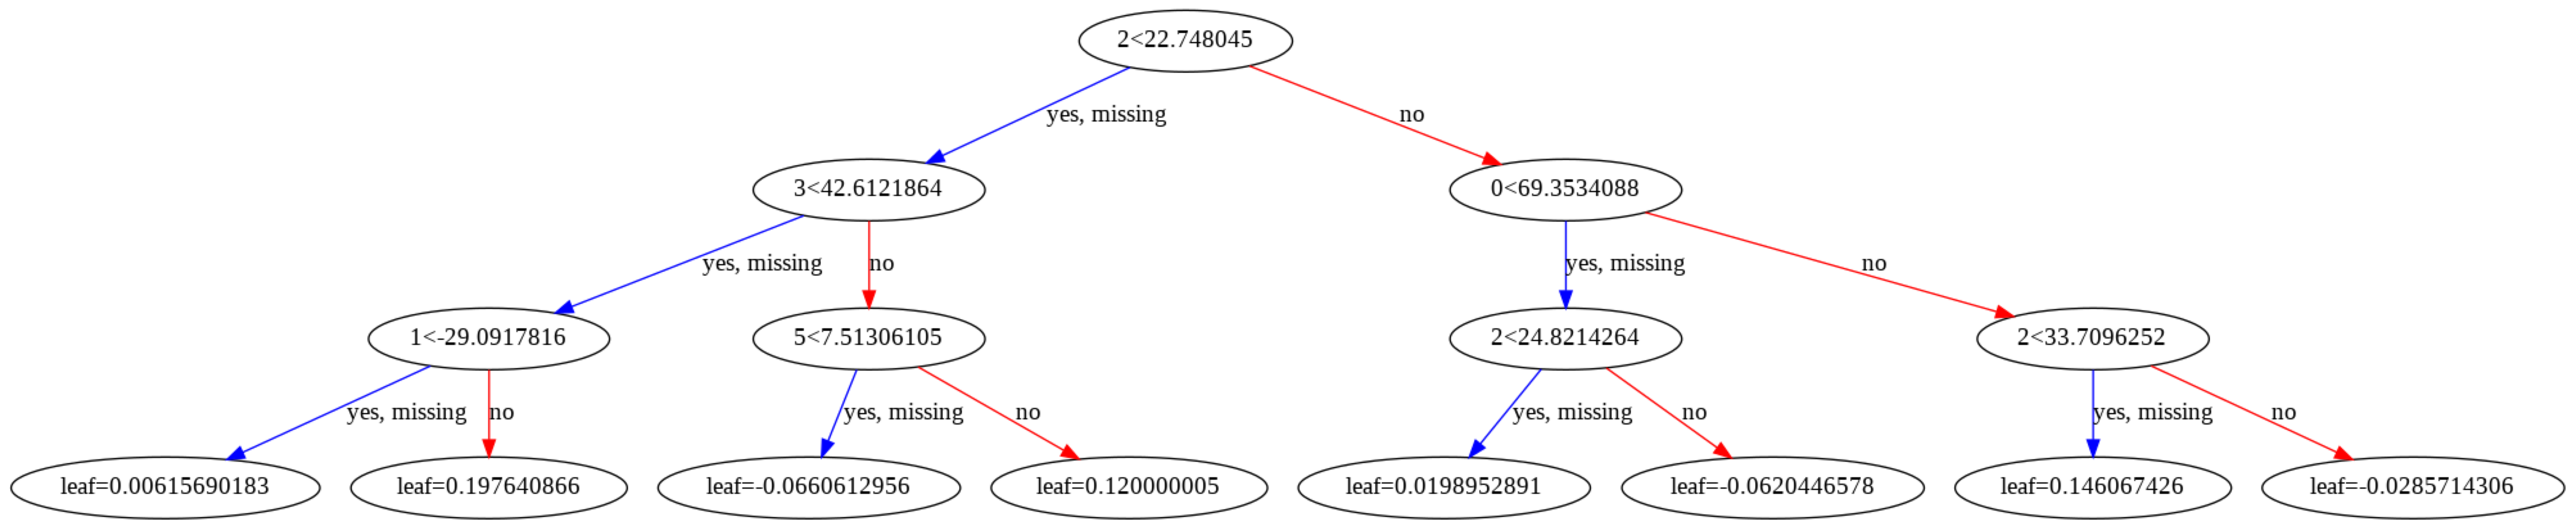

In [ ]:
from xgboost import plot_tree
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 80,50

plot_tree(model)

## Modèle Regression Logistique

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,solver="newton-cg").fit(X_train, y_train)
clf.score(X_test,y_test)

0.9967447916666666